# Ensemble Forecast

## Libraries and Data

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import predictions
df = pd.concat(map(pd.read_csv, ['predictions-prophet.csv',
                                 'predictions-sarimax.csv',
                                 'predictions-silverkite.csv',
                                 'predictions-lstm.csv']),
               axis=1)
df.head()

,ds,prophet,Date,sarimax,Unnamed: 0,ts,silverkite,Date,lstm
0,2021-01-01,723.728534,2021-01-01,739.874432,2192,2021-01-01,750.518503,2021-01-01,734.494726
1,2021-01-02,835.352606,2021-01-02,856.312084,2193,2021-01-02,833.825895,2021-01-02,871.013356
2,2021-01-03,753.792674,2021-01-03,767.567530,2194,2021-01-03,752.872797,2021-01-03,779.134781
3,2021-01-04,880.116577,2021-01-04,907.626374,2195,2021-01-04,896.849763,2021-01-04,933.938906
4,2021-01-05,750.049281,2021-01-05,779.803536,2196,2021-01-05,779.597889,2021-01-05,791.818786


In [6]:
# Fetch what we need
df = df[['ds', 'prophet', 'sarimax', 'silverkite', 'lstm']]
df.head()

,ds,prophet,sarimax,silverkite,lstm
0,2021-01-01,723.728534,739.874432,750.518503,734.494726
1,2021-01-02,835.352606,856.312084,833.825895,871.013356
2,2021-01-03,753.792674,767.567530,752.872797,779.134781
3,2021-01-04,880.116577,907.626374,896.849763,933.938906
4,2021-01-05,750.049281,779.803536,779.597889,791.818786


In [7]:
# Reindex
df.index = df.pop('ds')
df.head()

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,723.728534,739.874432,750.518503,734.494726
2021-01-02,835.352606,856.312084,833.825895,871.013356
2021-01-03,753.792674,767.567530,752.872797,779.134781
2021-01-04,880.116577,907.626374,896.849763,933.938906
2021-01-05,750.049281,779.803536,779.597889,791.818786


## Errors and Weights

In [17]:
# Get errors
error_prophet = float(pd.read_csv('../best-params-prophet.csv').iloc[4,1])  # .iloc values depend on file
error_sarimax = float(pd.read_csv('../best-params-SARIMAX.csv').iloc[6,1])
error_silverkite = float(pd.read_csv('../best-params-silverkite.csv').iloc[0,1])
error_lstm = float(pd.read_csv('../best-params-lstm.csv').iloc[7,1])
error_prophet, error_sarimax, error_silverkite, error_lstm

(48.042216320437696, 59.95521221161768, 47.8, 96.27426839480717)

In [18]:
# Average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm) / 4
print(f'The average error is {average_error}')

The average error is 63.01792423171564


In [19]:
# Initial weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f'The Prophet weight is {weight_prophet}')

weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f'The SARIMAX weight is {weight_sarimax}')

weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f'The Silverkite weight is {weight_silverkite}')

weight_lstm = 0.25 / (error_lstm / average_error)
print(f'The LSTM weight is {weight_lstm}')

The Prophet weight is 0.32792993880315174
The SARIMAX weight is 0.2627708330398691
The Silverkite weight is 0.3295916539315672
The LSTM weight is 0.16364165961066576


In [20]:
# Add weights to find extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f'Adding the weights equals to {extra_weight}')

Adding the weights equals to 1.0839340853852537


## Ensemble

In [21]:
# Ensemble
df['ensemble'] = (df.prophet * weight_prophet +
                  df.sarimax * weight_sarimax +
                  df.silverkite * weight_silverkite +
                  df.lstm * weight_lstm) / extra_weight
df.head()

,prophet,sarimax,silverkite,lstm,ensemble
ds,,,,,
2021-01-01,723.728534,739.874432,750.518503,734.494726,737.414070
2021-01-02,835.352606,856.312084,833.825895,871.013356,845.353152
2021-01-03,753.792674,767.567530,752.872797,779.134781,760.678214
2021-01-04,880.116577,907.626374,896.849763,933.938906,899.999212
2021-01-05,750.049281,779.803536,779.597889,791.818786,772.553192


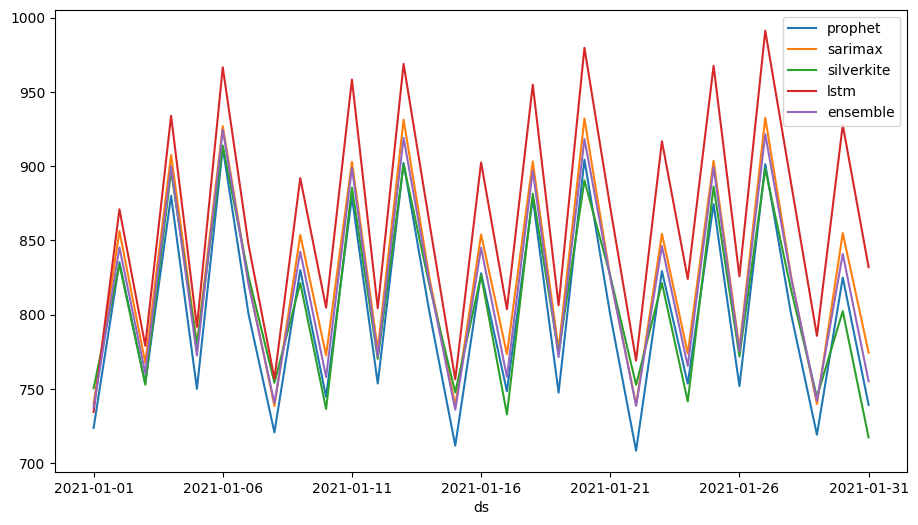

In [23]:
# Visualization
df.plot(figsize=(11, 6), legend=True);